<center style="font-size:250%;"> <strong style="color:red;"> TP N°1 : JEU DE LA VIE </strong> </center><br>


<center>   MASTER1-MIND </center><br>
<center>  2019-2020 </center><br>


<center>  HMMA238 Développement Logiciel </center><br>


<center style="font-size:200%;">  AMGHAR CHERIF  </center><br>
*****   

<center style="font-size:190%;"> <strong style="color:blue;"> Présentation du sujet: </strong> </center><br>


<center style="font-size:140%;"> Le jeu de la vie 2 est un automate cellulaire mis au point par le mathématicien britannique

John Horton Conway en 1970. Il constitue l'exemple le plus connu d'un automate cellulaire. Le "jeu" est en fait un jeu à zéro 

joueur, ce qui signifie que son évolution est déterminée par son état initial et ne nécessite aucune intervention de la part 

d'un humain. On interagit avec le jeu de la vie en créant une configuration initiale ; il ne reste plus alors qu'à observer son 

évolution. L'univers du jeu est initialement une grille orthogonale bidimensionnelle infinie de cellules carrées. Dans la suite 

du projet on supposera cependant que la grille est carrée et de taille finie pour éviter toute dificulté. On supposera aussi que 

le pourtour de la grille est toujours inactif/mort. Les cellules du jeu ne peuvent prendre qu'un état parmi l'un des deux états 

possibles : vivant (1) ou mort (0). Chaque cellule interagit avec ses huit cellules voisines (ce sont les cellules directement 

adjacentes horizontalement, verticalement ou en diagonale), comme indiqué sur la Figure 1.

<img src="https://raw.githubusercontent.com/Elpysum/Projet-Dev-Log/master/Images/F1.jpg" width="500">

À chaque étape, les transitions suivantes se produisent :

a) Toute cellule morte ayant exactement 3 voisins vivants devient une cellule vivante (naissance),cf. Figure 2a.

b) Toute cellule vivante avec 2 ou 3 voisins vivants reste vivante à la génération suivante (équilibre),cf. Figure 2b.

c) Toute cellule vivante ayant 4 voisins vivants meurt à la génération suivante (mort par étouffement), cf. Figure 2c.

d) Toute cellule vivante ayant 0 ou 1 voisin vivant décède à la génération suivante (mort par isolement), cf. Figure 2d.

<img src="https://raw.githubusercontent.com/Elpysum/Projet-Dev-Log/master/Images/F2.jpg" width="700">

</center><br>

<p style='text-align: justify;'> Le modèle initial constitue la "graine" du système. La première génération est crée en appliquant les règles ci-dessus simultanément à chaque cellule de la graine - les naissances et les décès se produisent simultanément. Ainsi chaque génération est une fonction de la précèdente. Les règles continuent d'être appliquées de manière répétée pour créer d'autres générations. </p>

In [125]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.animation import FuncAnimation
%matplotlib notebook

Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py", line 389, in process
    proxy(*args, **kwargs)
  File "C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py", line 227, in __call__
    return mtd(*args, **kwargs)
  File "C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\animation.py", line 1560, in _stop
    self.event_source.remove_callback(self._loop_delay)
AttributeError: 'NoneType' object has no attribute 'remove_callback'


In [126]:
filename = "HMMA238_TP_mohamedcherifamghar.ipynb"
taille_str = len(filename)
ma_graine = taille_str % 6
print ("Ma graine est le reste de la division euclidienne est égale à {}.".format(ma_graine))

Ma graine est le reste de la division euclidienne est égale à 0.


### Implémentation sans numpy:


Toutes les fonctions définies, par la suite, sont placées dans un fichier **utils.py** que l'on appellera depuis le notebook.
De même, pour avoir la description de chaque fonction, nous allons utiliser **help**.

On va fournir ci-dessous le code Python pour coder ce jeu. Dans la suite on va coder les cellules vivantes par des 1 et les cellules mortes par des 0.   

Tout d'abord on définit la fonction **calcul_nb_voisins**, comme ceci :

In [127]:
def calcul_nb_voisins(Z):
    """Cette fonction permet de calculer le nombre de voisins.
        
    Les paramétres
    ---------------
        Z : une liste de liste contient que des 0 et 1.

    Retour
    --------
        N : une liste de liste de même taille que Z ainsi chaque éléments de N contient la somme des 8 voisinages.
    
    Exemple
    ---------
        >>> Z = [[0, 0, 0, 0, 0, 0], [0, 0, 0, 1, 0, 0], [0, 1, 0, 1, 0, 0], [0, 0, 1, 1, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0]]
        >>> calcul_nb_voisins(Z)
        [[0, 0, 0, 0, 0, 0], [0, 1, 3, 1, 2, 0], [0, 1, 5, 3, 3, 0], [0, 2, 3, 2, 2, 0], [0, 1, 2, 2, 1, 0], [0, 0, 0, 0, 0, 0]]
    """
    forme = len(Z), len(Z[0])
    N = [[0, ] * (forme[0]) for i in range(forme[1])]
    for x in range(1, forme[0] - 1):
        for y in range(1, forme[1] - 1):
            N[x][y] = Z[x-1][y-1]+Z[x][y-1]+Z[x+1][y-1] \
                + Z[x-1][y] + Z[x+1][y] \
                + Z[x-1][y+1]+Z[x][y+1]+Z[x+1][y+1]
    return N

In [128]:
from utils import calcul_nb_voisins
calcul_nb_voisins?

#### Question 4
On applique la fonction précédente à la cellule Z:

In [129]:
Z = [[0, 0, 0, 0, 0, 0],
     [0, 0, 0, 1, 0, 0],
     [0, 1, 0, 1, 0, 0],
     [0, 0, 1, 1, 0, 0],
     [0, 0, 0, 0, 0, 0],
     [0, 0, 0, 0, 0, 0]]

print (calcul_nb_voisins(Z))

[[0, 0, 0, 0, 0, 0], [0, 1, 3, 1, 2, 0], [0, 1, 5, 3, 3, 0], [0, 2, 3, 2, 2, 0], [0, 1, 2, 2, 1, 0], [0, 0, 0, 0, 0, 0]]


In [130]:
def iteration_jeu(Z):
    """Cette fonction permet de réaliser une itération de jeu.

    Si une cellule a trois voisines vivantes, elle devient vivante peu importe son état initial(morte, vivante).
    Si une cellule a deux voisines vivantes, elle reste dans son état actuel.
    Si une cellule a strictement moins de deux ou strictement plus de trois voisines vivantes, elle devient morte.
    Tous les autres cas restent dans son état.
    
    Les paramétres
    ---------------
        Z : c'est une liste de listes.

    Retour
    ------
        Z : c'est une liste de listes, qui donne l'état de la cellule aprés une itération. 

    Example
    -------
        >>> cellule_init = [[0,0,0,0],[0,0,1,0],[0,1,1,0],[0,0,0,0]]
        >>> iteration_jeu(cellule_init)
        [[0, 0, 0, 0], [0, 1, 1, 0], [0, 1, 1, 0], [0, 0, 0, 0]]
    """
    forme = len(Z), len(Z[0])
    N = calcul_nb_voisins(Z)
    for x in range(1, forme[0]-1):
        for y in range(1, forme[1]-1):
            if Z[x][y] == 1 and (N[x][y] < 2 or N[x][y] > 3):
                Z[x][y] = 0
            elif Z[x][y] == 0 and N[x][y] == 3:
                Z[x][y] = 1
    return Z

In [131]:
help(iteration_jeu)

Help on function iteration_jeu in module __main__:

iteration_jeu(Z)
    Cette fonction permet de réaliser une itération de jeu.
    
    Si une cellule a trois voisines vivantes, elle devient vivante peu importe son état initial(morte, vivante).
    Si une cellule a deux voisines vivantes, elle reste dans son état actuel.
    Si une cellule a strictement moins de deux ou strictement plus de trois voisines vivantes, elle devient morte.
    Tous les autres cas restent dans son état.
    
    Les paramétres
    ---------------
        Z : c'est une liste de listes.
    
    Retour
    ------
        Z : c'est une liste de listes, qui donne l'état de la cellule aprés une itération. 
    
    Example
    -------
        >>> cellule_init = [[0,0,0,0],[0,0,1,0],[0,1,1,0],[0,0,0,0]]
        >>> iteration_jeu(cellule_init)
        [[0, 0, 0, 0], [0, 1, 1, 0], [0, 1, 1, 0], [0, 0, 0, 0]]



#### Question 5:

In [132]:
def iterations_10(Z):
    """Cette fonction affiche une simulation de 10 premièrs itérations pour la cellule Z, affiché sous forme de 2 lignes et 5 colonnes.
    
    Les paramétres
    --------------
        Z : une liste de listes (cellule initial)
    
    """
    plt.subplots(figsize=(15,10))
    for i in range(10):
        ax = plt.subplot(2,5,i+1)
        plt.imshow(Z, extent=[0,len(Z[0]),0,len(Z)])
        plt.grid(True)
        ax.set_xticks(range(0,len(Z[0]),1))
        plt.title("Jeu de la vie pour l'itération" + str(i)) 
        
        Z = iteration_jeu(Z) 

    plt.show()

In [133]:
import matplotlib.pyplot as plt
help(iterations_10)

Help on function iterations_10 in module __main__:

iterations_10(Z)
    Cette fonction affiche une simulation de 10 premièrs itérations pour la cellule Z, affiché sous forme de 2 lignes et 5 colonnes.
    
    Les paramétres
    --------------
        Z : une liste de listes (cellule initial)



<IPython.core.display.Javascript object>


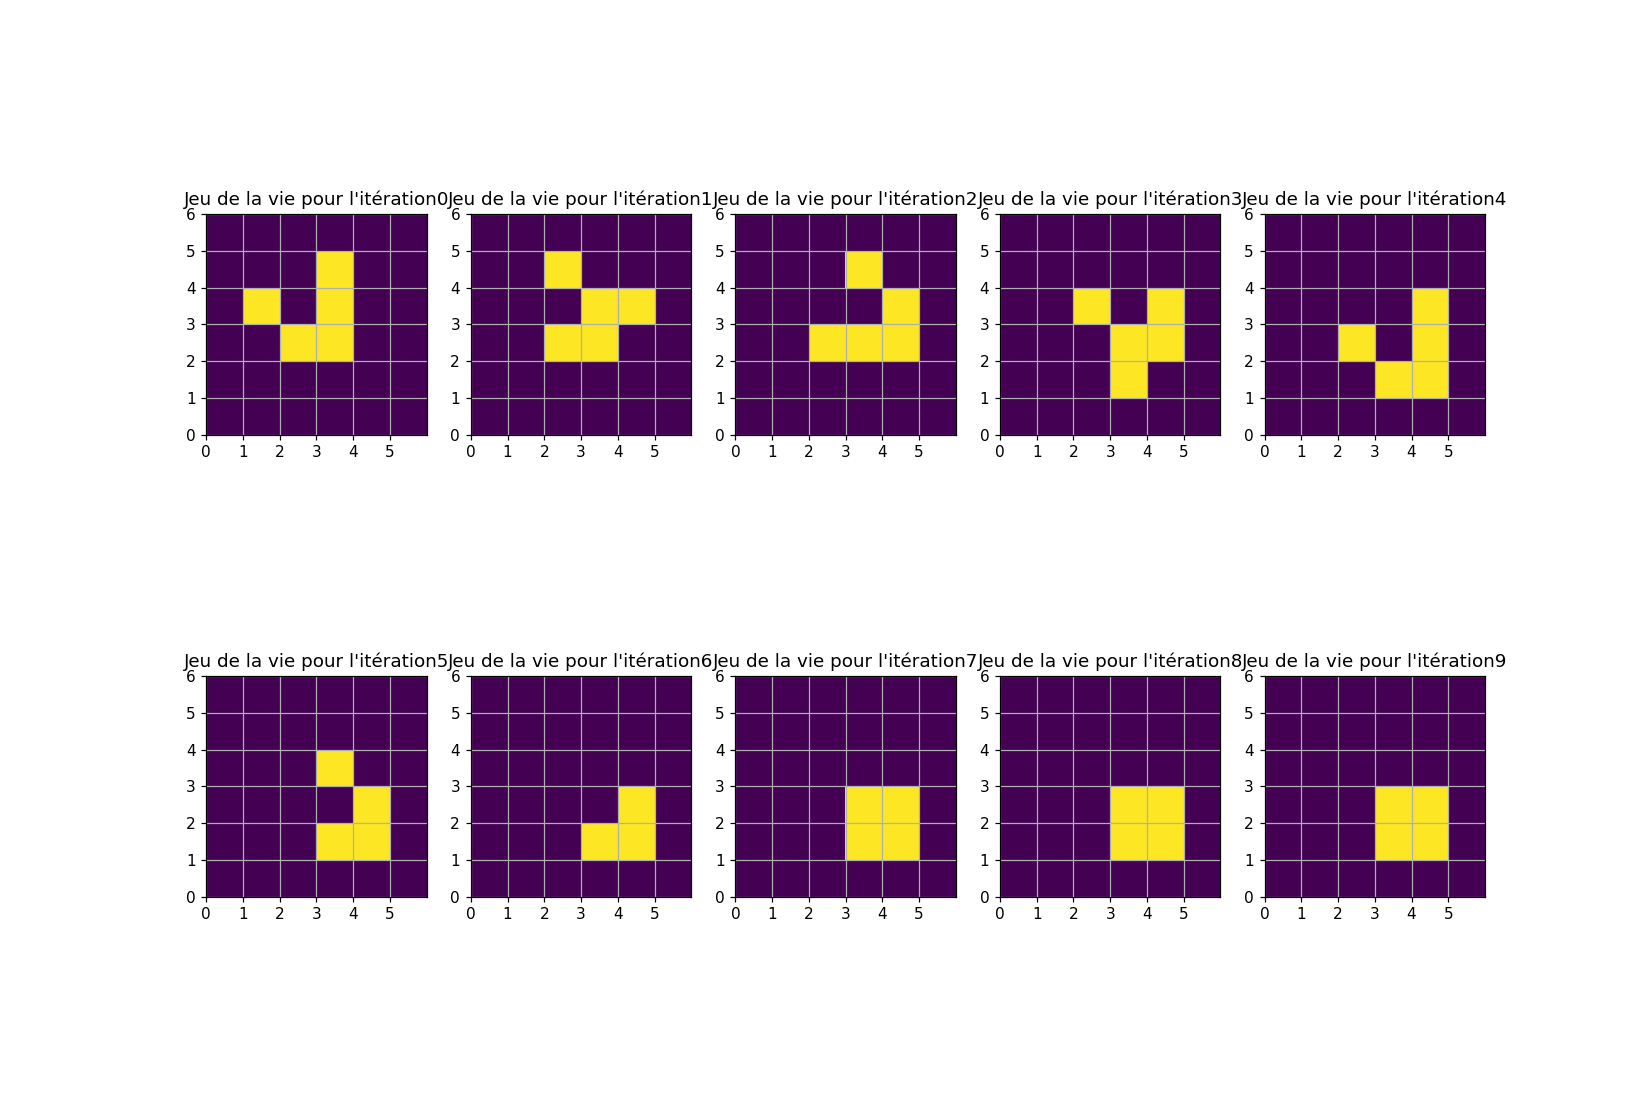

In [134]:
Z = ([[0,0,0,0,0,0],
    [0,0,0,1,0,0],
    [0,1,0,1,0,0],
    [0,0,1,1,0,0],
    [0,0,0,0,0,0],
    [0,0,0,0,0,0]])
iterations_10(Z)

#### Question 6:

On remarque qu'on revient à la forme initiale dans la quatrième itération mais avec un décalage vers la droite en bas et entre ces itérations les cellules partent du côté gauche vers la droite, aprés l'itération 7 on observe une stabilité des cellules respectant la régle des trois voisines vivantes et on néglige les bornes(mort). Donc on obtient  l'équilibre.

### Implémentation avec *numpy*


##### Question 7:

In [135]:
vect = np.array([0, 1, 0, 0, 1, 1])
nb_vect = np.zeros(vect.shape)
nb_vect[1:-1]  += (vect[:-2] + vect[2:])
nb_vect

array([ 0.,  0.,  1.,  1.,  1.,  0.])

A l'intérieur du vecteur si une cellule a au moins une cellule voisine donc elle devient vivante peu importe leur état initial, mais on ne se s'intéresse pas au bord du vecteur(elles deviennent mortes dans tous les cas).

#### Question 8:

In [136]:
def calcul_nb_voisins_np(Z):
    """Cette fonction permet de calculer le nombre de voisins en utilisant le slicing.

    Les paramétres
    --------------
        Z : un tableau numpy. 

    Retour
    ------
        nb_vois : un tableau qui contient le nombre de voisins pour chaque entrée encore on s'intéresse pas au bord. 
    
    Exemple
    -------
        >>> Y = np.array([[0, 0, 0, 0, 0, 0], [0, 0, 0, 1, 0, 0], [0, 1, 1, 1, 0, 0], [0, 0, 1, 1, 0, 0], [0, 0, 1, 0, 0, 0], [0, 0, 0, 0, 0, 0]])
        >>> calcul_nb_voisins_np(Y)
        array([[ 0.,  0.,  0.,  0.,  0.,  0.], [ 0.,  2.,  4.,  2.,  2.,  0.], [ 0.,  2.,  5.,  4.,  3.,  0.], [ 0.,  4.,  5.,  4.,  2.,  0.], [ 0.,  2.,  2.,  3.,  1.,  0.], [ 0.,  0.,  0.,  0.,  0.,  0.]])
    """
    nb_vois = np.zeros(np.shape(Z))
    nb_vois[1:-1, 1:-1] = Z[0:-2, 0:-2] + Z[:-2, 2:] + Z[2:, :-2] + Z[:-2, 1:-1] + \
        Z[1:-1, 2:] + Z[1:-1, :-2] + Z[2:, 1:-1] + Z[2:, 2:]
    return(nb_vois)

In [137]:
Z = np.array([[0, 0, 0, 0, 0, 0],
     [0, 0, 0, 1, 0, 0],
     [0, 1, 0, 1, 0, 0],
     [0, 0, 1, 1, 0, 0],
     [0, 0, 0, 0, 0, 0],
     [0, 0, 0, 0, 0, 0]])
calcul_nb_voisins_np(Z)

array([[ 0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  1.,  3.,  1.,  2.,  0.],
       [ 0.,  1.,  5.,  3.,  3.,  0.],
       [ 0.,  2.,  3.,  2.,  2.,  0.],
       [ 0.,  1.,  2.,  2.,  1.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.]])

On remarque qu'on obtient le même résultat que l'implémentation sans numpy mais la différence c'est dans le temps d'exécution(plus rapide que la première).

#### QUESTION 9

In [138]:
def iteration_jeu_np(Z):
    """Cette fonction permet de réaliser une itération de jeu rapide.

    Si une cellule a trois voisines vivantes, elle devient vivante peu importe son état initial(morte, vivante).
    Si une cellule a deux voisines vivantes, elle reste dans son état actuel.
    Si une cellule a strictement moins de deux ou strictement plus de trois voisines vivantes, elle devient morte.
    Tous les autres cas restent dans son état.
    
    Les paramétres
    ---------------
        Z : un tableau numpy.

    Retour
    ------
        Z : un tableau numpy de même dimension que le tableau initial , qui donne l'état de la cellule aprés une itération. 

    Example
    -------
        >>> tab_init = np.array([[0,0,0,0],[0,0,1,0],[0,0,1,0],[0,0,0,0]])
        >>> iteration_jeu_np(tab_init)
        [[0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0]]
    """
    Z = np.array(Z)
    Nov_arr = Z.copy() #pour ne pas modifier le tableau initial Z.
    nb_vois = calcul_nb_voisins_np(Z) #on utilise la fonction de Question 8. 
    cellule_viv = np.where((Nov_arr == 0) & (nb_vois == 3)) #d'aprés la description de la fonction, la cellule devient vivante. 
    Z[cellule_viv] = 1
    cellule_mor = np.where((Nov_arr == 1) & ((nb_vois == 1) | (nb_vois > 3))) #d'aprés la description de la fonction, la cellule devient morte.
    Z[cellule_mor] = 0
    return Z

In [139]:
tab_init = np.array([[0,0,0,0],[0,0,1,0],[0,0,1,0],[0,0,0,0]])
iteration_jeu_np(tab_init)

array([[0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0]])

#### Question 10

On appelle la fonction de la question précédente (iteration_jeu_np).

In [140]:
def jeu_np(Z_in, nb_iter):
    """Cette fonction permet de retourner une matrice aprés nb_iter.
    
    Les paramétres
    --------------
    
        Z_in : un tableau qui définit l'état de la matrice à l'état initial.
        nb_iter : un entier positif qui permet de voir après combien d'étapes on souhaite notre jeu.
    Exemple
    -------
        >>> Z = np.array([[0, 0, 0, 0, 0, 0], [0, 0, 0, 1, 0, 0], [0, 1, 0, 1, 0, 0], [0, 0, 1, 1, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0]])
        >>> jeu_np(Z, 4)
        array([[0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 1, 0], [0, 0, 1, 0, 1, 0], [0, 0, 0, 1, 1, 0], [0, 0, 0, 0, 0, 0]])
    """
    if nb_iter == 0:
        return(Z_in)
    else:
        return(jeu_np(iteration_jeu_np(Z_in), nb_iter-1))

La même remarque que l'itération 4 trouvé dans la première méthode sans numpy (les cellules se décalent vers la droite en bas gardent la forme initiale).

In [141]:
Z = np.array([[0, 0, 0, 0, 0, 0],
     [0, 0, 0, 1, 0, 0],
     [0, 1, 0, 1, 0, 0],
     [0, 0, 1, 1, 0, 0],
     [0, 0, 0, 0, 0, 0],
     [0, 0, 0, 0, 0, 0]])
iteration_jeu_np(Z)

array([[0, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0],
       [0, 0, 0, 1, 1, 0],
       [0, 0, 1, 1, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0]])

In [142]:
jeu_np(Z, 14)

array([[0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 1, 0],
       [0, 0, 0, 1, 1, 0],
       [0, 0, 0, 0, 0, 0]])

In [143]:
def jeudevie(init, msj):
    """Cette fonction permet de faire l'animation de jeu de la vie.
    
    Les paramétres
    --------------
        init : tableau initial (on peut dire que c'est "le plan" dans laquel on va faire l'animation)
        msj : tableau de même dimension que le tableau initial.
    """
    plt.figure()
    fig = plt.gcf()
    shw = plt.imshow(init)
    plt.title(" Jeu de la vie avec Z_huge")
    plt.show()

    def animate():
        shw.set_data(msj(init))
        return shw,

    anim = FuncAnimation(fig, animate,frames=200, interval=20, blit=True)
    return(anim)

<IPython.core.display.Javascript object>


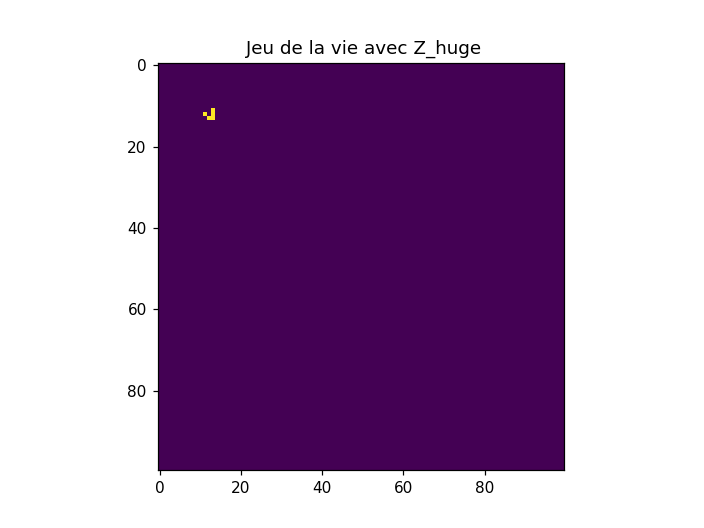

In [144]:
Z_huge = np.zeros((100, 100))
Z_np = np.array(
    [[0, 0, 0, 0, 0, 0],
     [0, 0, 0, 1, 0, 0],
     [0, 1, 0, 1, 0, 0],
     [0, 0, 1, 1, 0, 0],
     [0, 0, 0, 0, 0, 0],
     [0, 0, 0, 0, 0, 0]])
Z_huge[10:16, 10:16] = Z_np
jeudevie(Z_huge, iteration_jeu_np)

#### Question 12:

In [145]:
esperance = (1 + ma_graine) * 10 / 100  

<IPython.core.display.Javascript object>


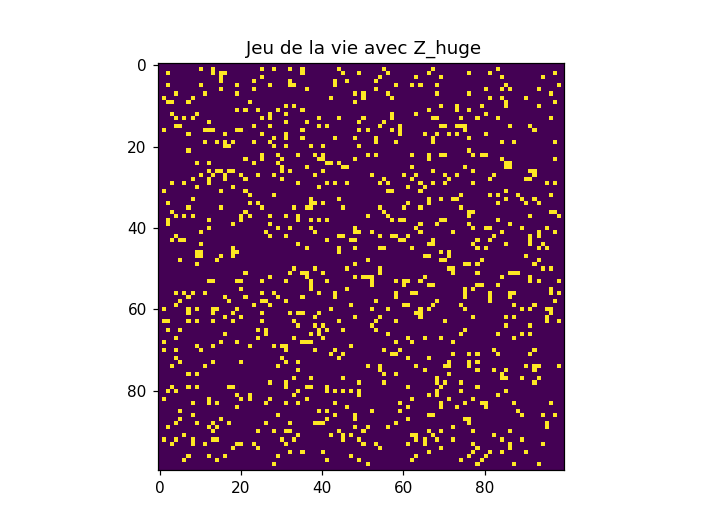

In [146]:
Z_huge = np.zeros((100, 100))
Z = np.random.binomial(1, esperance, size=(98, 98))
Z_huge[1:np.shape(Z_huge)[1]-1, 1:np.shape(Z_huge)[0]-1] = Z
fig = plt.figure()
shw = plt.imshow(Z_huge)

def animate(i):
    jeu_np(Z_huge, 1)
    shw = plt.imshow(Z_huge)
    return shw,
plt.title(" Jeu de la vie avec Z_huge")
anim = FuncAnimation(fig, animate)
plt.show()